#### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 YES/NO 결과에 따라 데이터셋 분리가 됨
- 장점: 스케일링, 정규화 불필요 (성능에 영향이 없음), 쉬운 알고리즘
- 단점: 과대적합 ==> 해결을 위한 많은 하이퍼파라미터가 존재!
- 다른 ML알고리즘에 비해 성능이 저조함 --> 단, 여러개의 DT가 모이면 성능 강해짐
    - 앙상블에 주로 사용!

In [147]:
# [1] 모듈로딩 및 데이터 준비
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 데이터 로딩
featureDF, targetSR= load_iris(as_frame= True, return_X_y=True)

print(f'featureDF: {featureDF.shape}, {featureDF.ndim}')
print(f'targetSR: {targetSR.shape}, {targetSR.ndim}')

featureDF: (150, 4), 2
targetSR: (150,), 1


In [148]:
# [2] 학습용 데이터셋 준비
X_train, X_test, Y_train, Y_test= train_test_split(featureDF, targetSR, random_state=10,
                                                   stratify=targetSR)
print(f'x_train: {X_train.shape}, {X_train.ndim}')
print(f'X_test: {X_test.shape}, {X_test.ndim}')

print(f'Y_train: {Y_train.shape}, {Y_train.ndim}')
print(f'Y_test: {Y_test.shape}, {Y_test.ndim}')

x_train: (112, 4), 2
X_test: (38, 4), 2
Y_train: (112,), 1
Y_test: (38,), 1


In [149]:
# [3] 학습 -> 기본학습(튜닝X)
# 모델 인스턴스 생성
dt_model= DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, Y_train)

# 모델 파라미터 확인 (학습용 데이터셋 기반으로 설정된 파라미터)
print(f'dt_model.n_classes_: {dt_model.n_classes_}')
print(f'dt_model.classes_: {dt_model.classes_}')
print(f'dt_model.max_features_: {dt_model.max_features_}')
print(f'dt_model.feature_names_in_: {dt_model.feature_names_in_}')
print(f'dt_model.feature_importances_: {dt_model.feature_importances_}')


dt_model.n_classes_: 3
dt_model.classes_: [0 1 2]
dt_model.max_features_: 4
dt_model.feature_names_in_: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
dt_model.feature_importances_: [0.03125249 0.         0.06844775 0.90029976]


In [150]:
# 성능
train_score= dt_model.score(X_train,Y_train)
test_score=dt_model.score(X_test,Y_test)

print(f'train_score: {train_score}')
print(f'test_score: {test_score}')
#데이터셋이 너무 적어서 과대적합-> 교차검증 필요!

train_score: 1.0
test_score: 1.0


In [151]:
# [4] 교차검증
from sklearn.model_selection import cross_validate
dt_model2= DecisionTreeClassifier(random_state=10)
# 모델 인스턴스, train데이터셋, cv
result= cross_validate(dt_model2, X_train, Y_train,
               return_estimator=True,
               return_train_score=True)
resultDF=pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.003986,0.000997,DecisionTreeClassifier(random_state=10),0.956522,1.0
1,0.001990,0.001249,DecisionTreeClassifier(random_state=10),0.956522,1.0
2,0.001006,0.000996,DecisionTreeClassifier(random_state=10),0.954545,1.0
3,0.001993,0.000997,DecisionTreeClassifier(random_state=10),0.909091,1.0
4,0.000997,0.000996,DecisionTreeClassifier(random_state=10),0.909091,1.0


In [152]:
# [5] 성능 향상을 위한 튜닝 -->하이퍼파라미터 설정
#  - min_depth, min_samples_leaf..... 많음

from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 딕셔너리 생성
params= {'max_depth': [4,3,2,1],
         'min_samples_leaf': [5,3,2]}
GS_model=GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True, return_train_score=True)
GS_model.fit(X_train, Y_train)
# 모델 파라미터 확인
print(f'GS_model.best_score_: {GS_model.best_score_}')
print(f'GS_model.best_params_: {GS_model.best_params_}')
print(f'GS_model.best_estimator_: {GS_model.best_estimator_}')
# print(f'GS_model.cv_results_: {GS_model.cv_results_}')
cv_result_DF=pd.DataFrame(GS_model.cv_results_)
cv_result_DF



GS_model.best_score_: 0.9371541501976285
GS_model.best_params_: {'max_depth': 4, 'min_samples_leaf': 2}
GS_model.best_estimator_: DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000650,0.000865,0.000000,0.000000,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.966667,0.955556,0.966667,0.957553,0.008543
1,0.002955,0.005910,0.000200,0.000400,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.977528,0.966667,0.966667,0.977778,0.968739,0.008423
2,0.001199,0.000399,0.001008,0.000030,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.956522,0.956522,0.954545,...,0.937154,0.022925,1,0.977528,0.977528,0.977778,0.977778,0.977778,0.977678,0.000122
3,0.000212,0.000423,0.000203,0.000406,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.966667,0.955556,0.966667,0.957553,0.008543
4,0.000200,0.000400,0.000264,0.000527,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.919368,0.034262,8,0.955056,0.955056,0.944444,0.955556,0.977778,0.957578,0.010930
5,0.001214,0.000391,0.000980,0.000604,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,...,0.919368,0.034262,8,0.955056,0.955056,0.966667,0.955556,0.977778,0.962022,0.009041
6,0.000190,0.000381,0.000000,0.000000,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
7,0.000299,0.000597,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
8,0.001423,0.000496,0.000801,0.000400,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
9,0.000187,0.000374,0.000000,0.000000,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.652174,0.652174,0.681818,...,0.651779,0.016601,10,0.674157,0.674157,0.666667,0.677778,0.677778,0.674107,0.004057


In [153]:
# 시각화

# 가장 좋은 모델
best_model= GS_model.best_estimator_
print(best_model.max_depth, best_model.min_samples_leaf)

# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_


4 2


(array([0.01321873, 0.        , 0.59964451, 0.38713677]), 4)

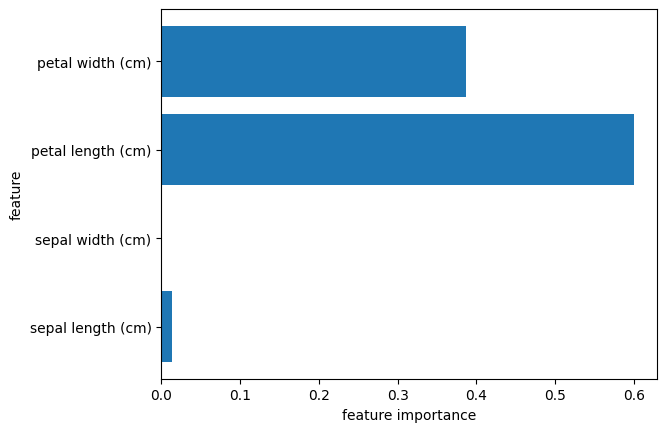

In [154]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

- DT 그래프 시각화
    - Graphviz 프로그램 설치+ python용 패키지 graphviz 설치

In [155]:
# (1) DT모델은 dot포멧의 파일로 저장 -> export_graphviz()
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='tree.dot',
                class_names=['setosa', 'versicolor', 'virginica'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)


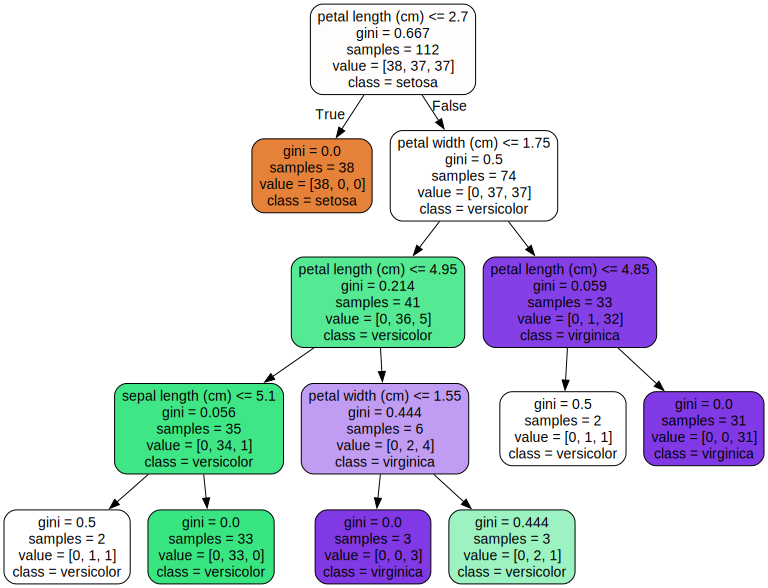

In [156]:
# (2) dot파일 출력

# 데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()
# 화면에 출력
graphviz.Source(dot_data)

In [157]:
# [6] 새로운 데이터 예측

new_data= featureDF.iloc[:1]+.21
best_model.predict(new_data)

array([0])

In [159]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])

In [199]:
print(f'asdfasf \n \
      sdfasdf')

asdfasf 
       sdfasdf
